In [8]:
# *************************************************************************************************
# Authors: Andi Sama, with Andrew Widjaja and Cahyati S. Sangaji
# Purpose: Image Pre-Processing with Open Source Tools
#   - Illustrates Image Manipulation (in Python) with PIL, Matplotlib, Keras and OpenCV
#     as part of Pre-Processing for doing AI in Computer Vision
# Organization: Sinergi Wahana Gemilang
#
# Creation Date: April 1, 2020
# Changes history:
#   - April 2, 2020: Adding additional functions in PIL for better illustration
#   - April 3, 2020: Adding additional functions in Keras for better illustration
#   - April 4, 2020: Adding additional functions in OpenCV for better illustration
#   - April 5, 2020: Tidying up overall for article in medium.com 
#
# References: See article in medium.com/@andisama
# *************************************************************************************************

In [9]:
import os, platform
print('OS name:', os.name, ', system:', platform.system(), ', release:', platform.release())
import sys
print("Anaconda version:")
!conda list anaconda
print("Python version: ", sys.version)
print("Python version info: ", sys.version_info)
import PIL
print("PIL version: ", PIL.__version__)
import matplotlib
print("Matplotlib version: ", matplotlib.__version__)
import tensorflow as tf
print("Keras version:", tf.keras.__version__)
import cv2
print("OpenCV version: ", cv2.__version__)

OS name: nt , system: Windows , release: 10
Anaconda version:
# packages in environment at C:\Users\andis\anaconda3:Python version: 
#
# Name                    Version                   Build  Channel
_anaconda_depends         2019.03                  py37_0  
anaconda                  custom                   py37_1  
anaconda-client           1.7.2                    py37_0  
anaconda-navigator        1.9.12                   py37_0  
anaconda-project          0.8.4                      py_0  
 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Python version info:  sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)
PIL version:  7.0.0
Matplotlib version:  3.1.3
Keras version: 2.2.4-tf
OpenCV version:  4.2.0


In [10]:
# *************************************************************************************************
# A. IMAGE MANIPULATION with PIL - Python Image Library
# First of all, VIEWing an IMAGE
# *************************************************************************************************
# - first import necessary libraries
import numpy as np
from PIL import Image
# - set a few generic variables
FilePath = 'data/'
FileName = 'smurf'
FileExt = '.jpg'
ImageFile = FilePath + FileName + FileExt
# - open the imagefile
img = Image.open(ImageFile)
# - inspect necessary information
print('Image format: ', img.format)
print('Image mode: ', img.mode)
# - display
img.show()

Image format:  JPEG
Image mode:  RGB


In [11]:
# A.1. CONVERT an IMAGE to NP ARRAY
# --------------------------------- 
# - first import necessary libraries
from numpy import asarray
# - convert image format to numpy array
data = asarray(img)
# - inspect necessary information
print('data type: ', type(data))
print('data shape: ', data.shape)

data type:  <class 'numpy.ndarray'>
data shape:  (393, 700, 3)


In [12]:
print(data)

[[[ 82  99 143]
  [ 93 107 156]
  [ 99 105 165]
  ...
  [215 234 248]
  [215 234 248]
  [215 234 248]]

 [[100 117 161]
  [ 93 107 156]
  [116 121 179]
  ...
  [215 234 248]
  [215 234 248]
  [215 234 248]]

 [[120 137 183]
  [100 112 162]
  [137 142 200]
  ...
  [215 234 248]
  [215 234 248]
  [215 234 248]]

 ...

 [[149 181 230]
  [150 182 229]
  [147 179 226]
  ...
  [ 77  59 145]
  [ 77  59 143]
  [ 78  58 143]]

 [[102 143 199]
  [120 161 217]
  [132 173 229]
  ...
  [ 73  58 143]
  [ 76  58 142]
  [ 77  57 142]]

 [[116 160 223]
  [ 98 142 205]
  [103 147 208]
  ...
  [ 69  54 139]
  [ 72  54 140]
  [ 74  54 139]]]


In [13]:
# A.2. CONVERT NP ARRAY back to IMAGE format
# ------------------------------------------
# - convert numpy array to image format
img_fromnparray = Image.fromarray(data)
img_fromnparray.show()
# - inspect necessary information
print('Image size: ', img_fromnparray.size)
print('Image format: ', img_fromnparray.format)
print('Image mode: ', img_fromnparray.mode)

Image size:  (700, 393)
Image format:  None
Image mode:  RGB


In [14]:
# A.3. SAVE the IMAGE to ANOTHER FORMAT, e.g. PNG (source was JPG before)
# -----------------------------------------------------------------------
#  - 1st reopen image, and save is as PNG
data = asarray(Image.open(ImageFile))
print("Saving as PNG (RGB)...", FilePath + FileName)
print(type(data), data.shape)
img_png = Image.fromarray(data).save(FilePath + FileName + '_pil-rgb' + '.png')
#  - 2nd reopen image and convert it to grey, and save is as PNG 
data = asarray(Image.open(ImageFile).convert('L'))
print("Saving as PNG (Grey)...", FilePath + FileName)
print(type(data), data.shape)
img_png = Image.fromarray(data).save(FilePath + FileName + '_pil-grey' + '.png')

Saving as PNG (RGB)... data/smurf
<class 'numpy.ndarray'> (393, 700, 3)
Saving as PNG (Grey)... data/smurf
<class 'numpy.ndarray'> (393, 700)


Image dtype:  uint8
Image shape:  (393, 700, 3)


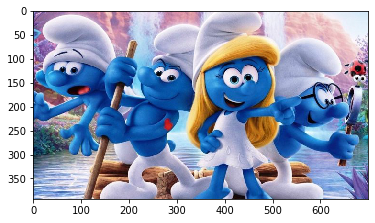

In [15]:
# *************************************************************************************************
# B. IMAGE MANIPULATION with Matplotlib
# *************************************************************************************************
# - first import necessary libraries
from matplotlib import image, pyplot
img = image.imread(ImageFile)
# - inspect necessary information
print('Image dtype: ', img.dtype)
print('Image shape: ', img.shape)
# - then show the image
pyplot.imshow(img)
# pyplot.show()

In [16]:
# A.4 Continuing IMAGE MANIPULATION with PIL
#     Rotate, Crop, Contrast & Brightness
# ------------------------------------------
#  - Image rotation with PIL
Rotation_Degree = 30
im = Image.open(ImageFile)
im.rotate(Rotation_Degree).show()
#  - Image crop with PIL
#    Looking at the pixel locations in above image, we can define the coordinate (box) to crop
box = (350, 100, 500, 200) #left, upper, right, lower
im.crop(box).show()
#  - Image Enhancements with PIL: Contrast
from PIL import ImageEnhance
enh = ImageEnhance.Contrast(im)
enh.enhance(1.75).show("75% more contrast")
#  - Image Enhancements with PIL: Brightness
enh = ImageEnhance.Brightness(im)
enh.enhance(1.5).show("50% more brightness")

In [17]:
# *************************************************************************************************
# C. IMAGE MANIPULATION with Keras (built on top of Tensorflow)
# *************************************************************************************************
# - first import necessary libraries
from keras.preprocessing.image import load_img
import warnings
# - load and view the image
img = load_img(ImageFile)
print('Image type:', type(img), ', image format:', img.format, ', image mode:', img.mode, ', image size:', img.size) 
img.show()

Using TensorFlow backend.


Image type: <class 'PIL.JpegImagePlugin.JpegImageFile'> , image format: JPEG , image mode: RGB , image size: (700, 393)


In [18]:
from keras.preprocessing.image import img_to_array, array_to_img
print('Original type of image:', type(img))
# - convert the image to numpy array
img_nparray = img_to_array(img)
print('Numpy array info:', type(img_nparray))
print('type:', type(img_nparray.dtype))
print('shape:', type(img_nparray.shape))

Original type of image: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Numpy array info: <class 'numpy.ndarray'>
type: <class 'numpy.dtype'>
shape: <class 'tuple'>


In [19]:
print(img_nparray)

[[[ 82.  99. 143.]
  [ 93. 107. 156.]
  [ 99. 105. 165.]
  ...
  [215. 234. 248.]
  [215. 234. 248.]
  [215. 234. 248.]]

 [[100. 117. 161.]
  [ 93. 107. 156.]
  [116. 121. 179.]
  ...
  [215. 234. 248.]
  [215. 234. 248.]
  [215. 234. 248.]]

 [[120. 137. 183.]
  [100. 112. 162.]
  [137. 142. 200.]
  ...
  [215. 234. 248.]
  [215. 234. 248.]
  [215. 234. 248.]]

 ...

 [[149. 181. 230.]
  [150. 182. 229.]
  [147. 179. 226.]
  ...
  [ 77.  59. 145.]
  [ 77.  59. 143.]
  [ 78.  58. 143.]]

 [[102. 143. 199.]
  [120. 161. 217.]
  [132. 173. 229.]
  ...
  [ 73.  58. 143.]
  [ 76.  58. 142.]
  [ 77.  57. 142.]]

 [[116. 160. 223.]
  [ 98. 142. 205.]
  [103. 147. 208.]
  ...
  [ 69.  54. 139.]
  [ 72.  54. 140.]
  [ 74.  54. 139.]]]


In [20]:
# - convert np array back to image
img_pil = array_to_img(img_nparray)
print("Converted (back) type of the image:", type(img_pil))
# - saving an image with keras
from keras.preprocessing.image import load_img, save_img
ImageFile = FilePath + FileName + '_keras' + '.png'
print("Saving Image File with Keras...", FilePath + FileName)
save_img(ImageFile, img_nparray)
# - loading an image with keras
print("Loading Image File with Keras...", FilePath + FileName)
img = load_img(ImageFile)
print('Image type:', type(img), ', image format:', img.format, ', image mode:', img.mode, ', image size:', img.size) 
img.show()

Converted (back) type of the image: <class 'PIL.Image.Image'>
Saving Image File with Keras... data/smurf
Loading Image File with Keras... data/smurf
Image type: <class 'PIL.PngImagePlugin.PngImageFile'> , image format: PNG , image mode: RGB , image size: (700, 393)


In [21]:
# - do image flip (horizontal)
from keras.preprocessing.image import ImageDataGenerator
img = load_img(ImageFile)
img_nparray = img_to_array(img)
Datagen = ImageDataGenerator()
flip_horizontal = Datagen.apply_transform(x=img_nparray, transform_parameters={'flip_horizontal':True})
array_to_img(flip_horizontal).show()
# - do image flip (vertical)
flip_vertical = Datagen.apply_transform(x=img_nparray, transform_parameters={'flip_vertical':True})
array_to_img(flip_vertical).show()

In [22]:
# - do image rotation
rotate = Datagen.apply_transform(x=img_nparray, transform_parameters={'theta':-25})
array_to_img(rotate).show()
# - zoom-out in x and y direction
zoom_out = Datagen.apply_transform(x=img_nparray, transform_parameters={'zx':2, 'zy':2})
array_to_img(zoom_out).show()
# - zoom-iin in x and y direction
zoom_in = Datagen.apply_transform(x=img_nparray, transform_parameters={'zx':.5, 'zy':.5})
array_to_img(zoom_in).show()

In [23]:
# *************************************************************************************************
# D. IMAGE MANIPULATION with OpenCV
# *************************************************************************************************
# - first import necessary libraries
# import cv2
# - set ImageFile to our original image, then read the image
ImageFile = FilePath + FileName + FileExt
im = cv2.imread(ImageFile)
#cv2.imshow("my image", im)
# - save the file as PNG before conversion (internally it's in BGR order)
cv2.imwrite(FilePath + FileName + '_opencvRGB' + '.png', im)
print(type(img))
# - convert to GRAY color space
img = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
# - save the file as PNG after conversion
cv2.imwrite(FilePath + FileName + '_opencvGREY' + '.png', img)
# - convert to HSV color space (typical for object tracking)
img = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
# - save the file as PNG after conversion
cv2.imwrite(FilePath + FileName + '_opencvHSV' + '.png', img)

<class 'PIL.PngImagePlugin.PngImageFile'>


True

In [24]:
# - apply 50% blur 
#   alternatively we can use cv2.imshow() to display the image instead of writing it to a file
#   e.g.:
#     cv2.imshow("OpenCV: apply 50% blur", img)
#     cv2.waitKey(0)
img = cv2.medianBlur(im, 5)
cv2.imwrite(FilePath + FileName + '_opencvBLUR' + '.png', img)
# - apply Edge Detection
img = cv2.Canny(im, 100, 200)
cv2.imwrite(FilePath + FileName + '_opencvEdgeDetect' + '.png', img)

True